<a href="https://colab.research.google.com/github/leonardogolinelli/rna_velo_tests/blob/main/velocyto_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/')
from generate_dataset import generate_data

<Figure size 1200x600 with 0 Axes>

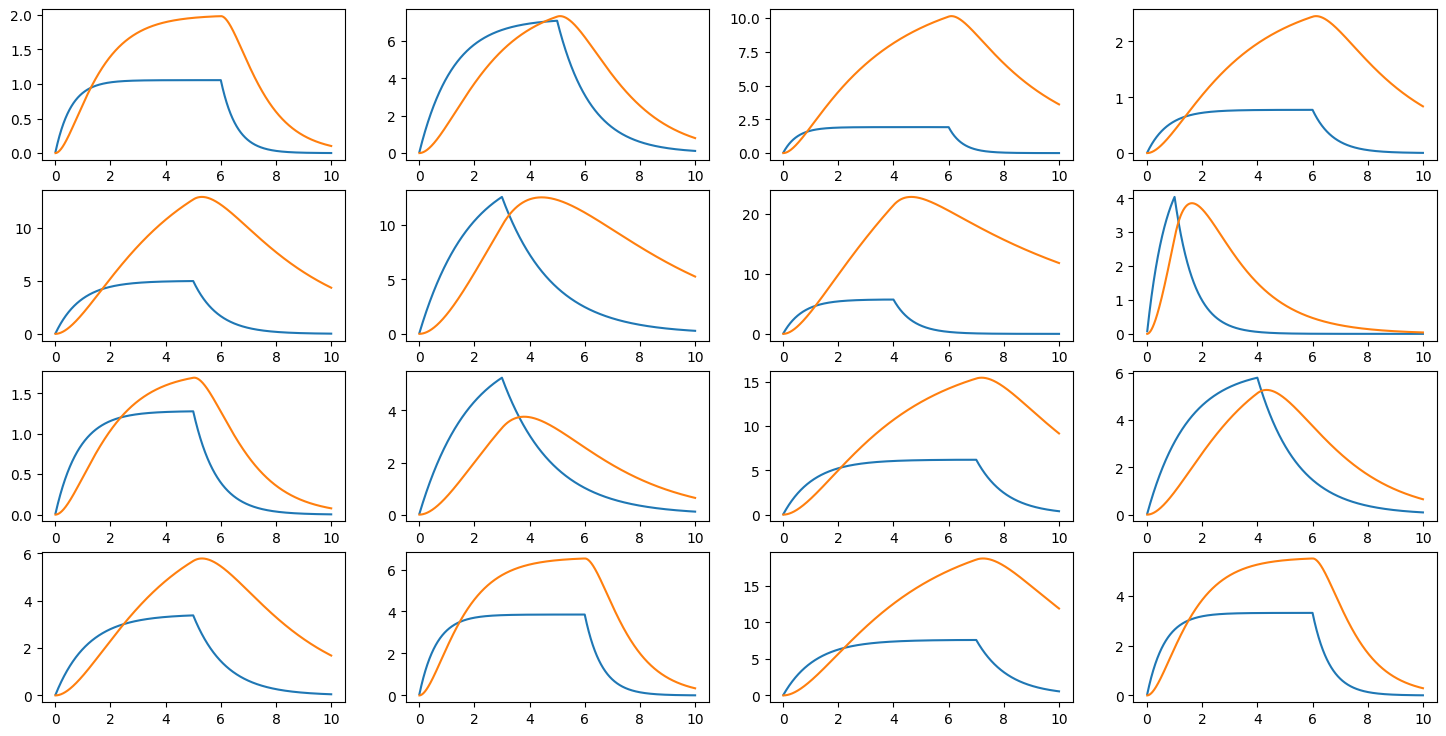

<Figure size 1200x600 with 0 Axes>

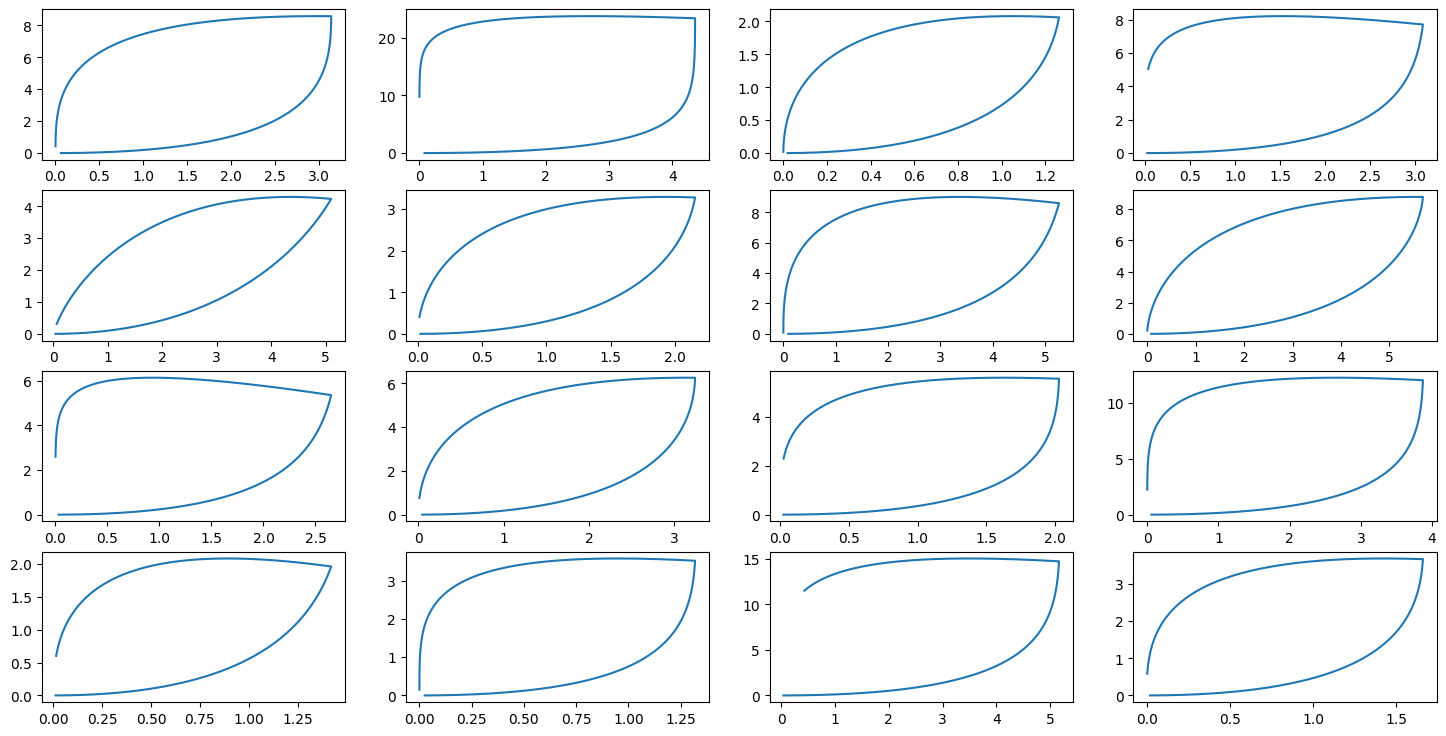

In [ ]:
dic, u, s = generate_data(plot=True)

In [ ]:
velocities = np.empty((3000,2000))
for i in range(2000):
  # Assume `data` is a 2-dimensional numpy array of shape (n, 2).
  x = u[:, i]
  y = s[:, i]

  # Compute the centroid.
  centroid_x = np.mean(x)
  centroid_y = np.mean(y)

  # Compute the Euclidean distance from each point to the centroid.
  distances = np.sqrt((x - centroid_x)**2 + (y - centroid_y)**2)

  # Compute the 1st and 99th percentiles of the distances.
  q1 = np.percentile(distances, 1)
  q99 = np.percentile(distances, 99)

  # Now, you can select the data at these extreme quantiles.
  q1_u = x[distances <= q1]
  q99_u = x[distances >= q99]
  q1_s = y[distances <= q1]
  q99_s = y[distances >= q99]

  #concatenate extreme percentiles for the linear fitting
  extr_q_u = np.concatenate((q1_u, q99_u))
  extr_q_s = np.concatenate((q1_s, q99_s))

  #fit u = gamma * s
  model = LinearRegression(fit_intercept=False)
  model.fit(extr_q_s.reshape(-1, 1), extr_q_u)  # need to reshape s to be a 2D array

  gamma = model.coef_[0]
  dic[str(i)]['gamma_fit'] = gamma
  mse = np.mean((dic[str(i)]['gamma'][0] - gamma)**2)
  dic[str(i)]['gamma_mse'] = mse

  v = x - gamma * y
  dic[str(i)]['v'] = v
  velocities[:,i] = v


In [ ]:
"""plt.scatter(x,y)
s_range = np.linspace(0,18, 100)
plt.plot(s_range*gamma, s_range)"""

'plt.scatter(x,y)\ns_range = np.linspace(0,18, 100)\nplt.plot(s_range*gamma, s_range)'

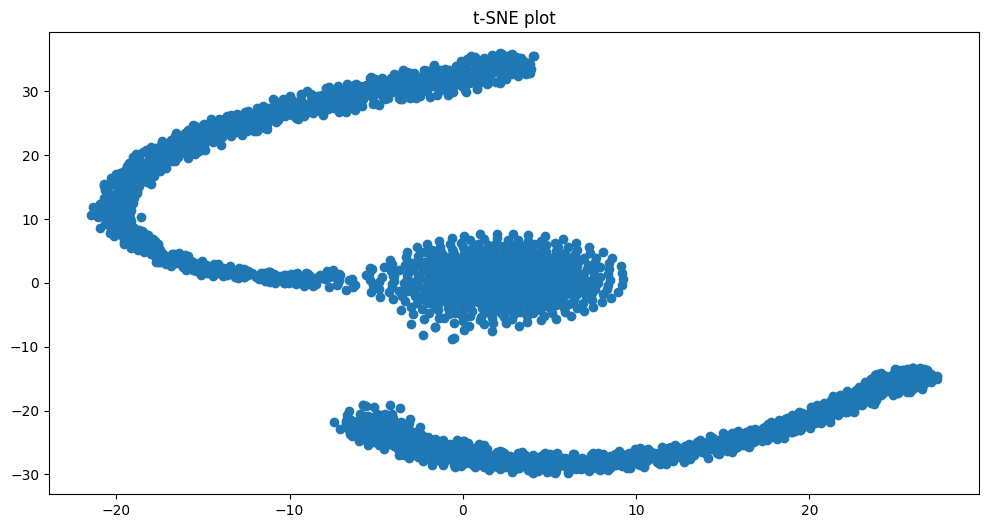

In [ ]:
# initialize a t-SNE model
model = TSNE(n_components=2, random_state=0)

# fit and transform the data
tsne_data = model.fit_transform(s)

# split the result into x and y coordinates to plot
x = tsne_data[:, 0]
y = tsne_data[:, 1]

# create the plot
plt.figure(figsize=(12, 6))
plt.scatter(x, y)
plt.title('t-SNE plot')
plt.show()


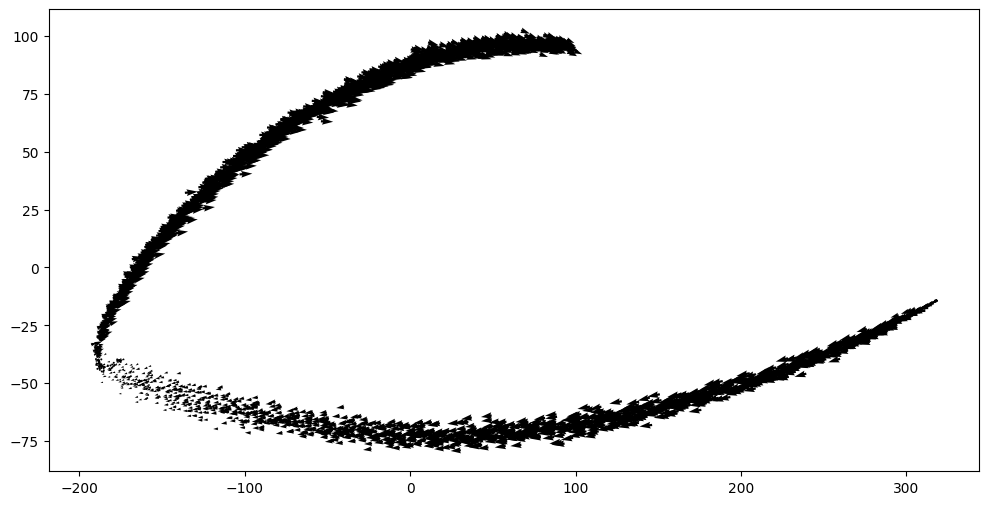

In [ ]:
pca = PCA(n_components=2)
spliced_pca = pca.fit_transform(s)
# Assuming gene_velocities is a numpy array with shape (n_cells, n_genes)
# and pca.components_ is a numpy array with shape (n_components, n_genes)
cell_velocities_pca = velocities @ pca.components_.T
plt.figure(figsize=(12,6))
plt.quiver(spliced_pca[:, 0], spliced_pca[:, 1], cell_velocities_pca[:, 0], cell_velocities_pca[:, 1])


In [ ]:
spliced_pca.shape

(3000, 2)

In [34]:
pca.components_.shape

(2, 2000)

In [35]:
velocities.shape

(3000, 2000)

In [37]:
cell_velocities_pca.shape

(3000, 2)